In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from collections import Counter
from wordcloud import WordCloud

In [109]:
# Data set
train_pos = "hotelPosT-train.txt"
train_neg = "hotelNegT-train.txt"

with open(train_pos, "r") as pos_file:
    pos_reviews = pos_file.readlines()
    
with open(train_neg, "r") as neg_file:
    neg_reviews = neg_file.readlines()

In [110]:
# pos_train, pos_test = train_test_split(pos_reviews, test_size=0.2, random_state=int(time.time()))

# neg_train, neg_test = train_test_split(neg_reviews, test_size=0.2, random_state=int(time.time()))


In [111]:
def count_words(reviews):
    '''
    Join all the reviews in a file and count occurences of each unigram.
    '''    
    count_r = 0
    split_reviews = []
    for r in reviews:    
        count_r += 1
        review = re.sub("[,.!?]", "", r)
        review = review.lower().split()
        split_reviews += review[1:]
        
    return split_reviews, Counter(split_reviews), count_r

words_list_pos, word_counts_pos, review_count_pos = count_words(pos_train)
words_list_neg, word_counts_neg, review_count_neg = count_words(neg_train)

In [112]:
# For smoothing later: size of set of unique words
V = len(set(words_list_neg+words_list_pos))
V

2477

In [113]:
count_pos = len(words_list_pos)
count_neg = len(words_list_neg)
total_words = count_pos + count_neg
len(words_list_pos), len(words_list_neg), total_words

(7514, 6845, 14359)

In [114]:
# These are P(class): FIX: count(id's in a class / total id's)
# prob_pos = count_pos / total_words
# prob_neg = count_neg / total_words
prob_pos = review_count_pos / (review_count_pos + review_count_neg)
prob_neg = review_count_neg / (review_count_pos + review_count_neg)
prob_pos, prob_neg

(0.504, 0.496)

In [115]:
count_pos, count_neg

(7514, 6845)

In [117]:
def predict_class(review, class_prob, class_count, V, word_counts):
    prediction = 0
    for word in review[1:]:
        # Compute conditional prob in log space
        word_count = word_counts[word] + 1
        prob_word_given_class = np.log((word_count) / (class_count + V))
        prediction += prob_word_given_class
    return prediction + np.log(class_prob)

# pos = predict_class(test_review, prob_pos, count_pos, V, word_counts_pos)
# neg = predict_class(test_review, prob_neg, count_neg, V, word_counts_neg)
# pos, neg, pos > neg

In [119]:
def make_decision(review, predict_class, prob_pos, count_pos, review_count_pos, word_counts_pos,
                 count_neg, review_count_neg, word_counts_neg):
    # Compute probabilities for positive and negative classes
    predict_pos = predict_class(review, prob_pos, count_pos, review_count_pos, word_counts_pos)
    predict_neg = predict_class(review, prob_neg, count_neg, review_count_neg, word_counts_neg)
    
    if predict_pos > predict_neg:
        return "POS"
    elif predict_pos < predict_neg:
        return "NEG"
    else:
        return "ERROR SOMEWHERE!!"

# make_decision(test_review, predict_class, prob_pos, count_pos, review_count_pos, word_counts_pos,
#                  count_neg, review_count_neg, word_counts_neg)

In [129]:
# Read test file and output class
# test_file = "test.txt"
# with open(test_file, 'r') as test:
#     test = test.readlines()

accuracies = []
# Run 100 times
for i in range(0, 5000):
    
    pos_train, pos_test = train_test_split(pos_reviews, test_size=0.25)
    neg_train, neg_test = train_test_split(neg_reviews, test_size=0.25)

    output = ""
    for line in neg_test:
        review = re.sub("[,.!]", "", line)
        review = review.lower().split()
        review_id = review[0].upper()
        review_output = "{}\t{}\n".format(review_id, make_decision(review, predict_class, prob_pos, count_pos, review_count_pos, word_counts_pos,
                 count_neg, review_count_neg, word_counts_neg))
        output += review_output
    with open("nguyen-dieumy-assgn3-out.txt", "w") as outfile:
        outfile.write(output)
        
    # Assess accuracy
#     with open("test_gold.txt", "r") as gold_file:
#         gold_file = gold_file.readlines()
    with open("nguyen-dieumy-assgn3-out.txt", "r") as test_file:
        test_file = test_file.readlines()

    accuracy = 0
    total = 0
    for line_i, line in enumerate(test_file):
        total += 1
#         if gold_file[line_i] == test_file[line_i]:
        if 'NEG' in test_file[line_i]:
            accuracy += 1

    accuracy = accuracy / total
    accuracies.append(accuracy)

0.9792083333333332

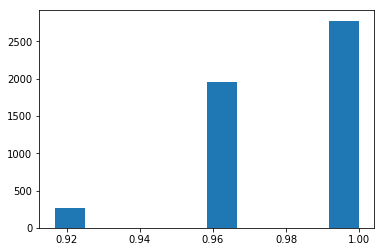

In [130]:
# Neg
plt.hist(accuracies)
np.mean(accuracies)

0.8955666666666666

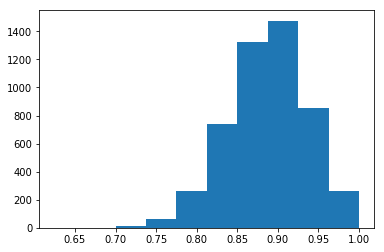

In [128]:
plt.hist(accuracies)
np.mean(accuracies)

In [131]:
(0.9792083333333332+0.8955666666666666)/2

0.9373874999999999